In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import os
import shutil
from itertools import combinations

#path to zipfile
zip_file_path = "/content/ML.zip"

#extract all contents from the zipfile
with ZipFile(zip_file_path, 'r') as zip_ref:
  zip_ref.extractall("/content/cleaned_dataset")
  print('Extraction done')

Extraction done


In [ ]:
# Mapping of inconsistent column names to standard names
column_name_mapping = {
    "Temp": "Temperature (C)",
    "Temperature": "Temperature (C)",
    "Temp (C)": "Temperature (C)",
    "Temperature(C)": "Temperature (C)",
    "temperature(C)": "Temperature (C)",
    "Dissolved O2": "Dissolved Oxygen (g/ml)",
    "DO": "Dissolved Oxygen (g/ml)",
    "Oxygen": "Dissolved Oxygen (g/ml)",
    "Dissolved Oxygen": "Dissolved Oxygen (g/ml)",
    "Dissolved Oxygen(g/ml)": "Dissolved Oxygen (g/ml)",
    "Turbidity": "Turbidity (NTU)",
    "turbidity (NTU)": "Turbidity (NTU)",
    "Turbidity(NTU)": "Turbidity (NTU)",
    "pH Level": "pH",
    "PH" : "pH",
    "pH": "pH",
    "Ammonia": "Ammonia (g/ml)",
    "Ammonia(g/ml)": "Ammonia (g/ml)",
    "ammonia(g/ml)": "Ammonia (g/ml)",
    "NH3": "Ammonia (g/ml)",
    "Nitrate": "Nitrate (g/ml)",
    "Nitrate(g/ml)": "Nitrate (g/ml)",
    "nitrate(g/ml)": "Nitrate (g/ml)",
    "NO3": "Nitrate (g/ml)",
    "Fish_Length": "Average_Length(cm)",
    "Fish_Length(cm)": "Average_Length(cm)",
    "Fish_length(cm)": "Average_Length(cm)",
    "Fish_Length (cm)": "Average_Length(cm)",
    "Fish_Length (cm)": "Average_Length(cm)",
    "Length": "Average_Length(cm)",
    "Fish_Weight": "Average_Weight(g)",
    "Fish_Weight(g)": "Average_Weight(g)",
    "Fish_Weight (g)": "Average_Weight(g)",
    "Fish_weight(g)": "Average_Weight(g)",
    "Fish_Weight (g)": "Average_Weight(g)",
    "Weight": "Average_Weight"
}



In [ ]:
def standardize_column_names(df, column_mapping):
    """
    Standardize column names in a DataFrame based on a mapping.

    Parameters:
    - df (pd.DataFrame): DataFrame with inconsistent column names.
    - column_mapping (dict): Mapping of inconsistent names to standard names.

    Returns:
    - pd.DataFrame: DataFrame with standardized column names.
    """
    # Rename columns using the mapping
    df.rename(columns=column_mapping, inplace=True)
    return df


In [ ]:
# Define the folder paths
pond_data_folder = "/content/cleaned_dataset/ML"
output_folder = "/content/standardized_pond_data"

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Get a list of all pond dataset files
pond_files = [file for file in os.listdir(pond_data_folder) if file.endswith('.csv')]

In [ ]:
# Process each dataset
for file in pond_files:
    print(f"Standardizing columns for {file}...")

    # Load the dataset
    file_path = os.path.join(pond_data_folder, file)
    df = pd.read_csv(file_path)

    # Standardize column names
    df = standardize_column_names(df, column_name_mapping)

    # Save the standardized dataset
    output_path = os.path.join(output_folder, f"standardized_{file}")
    df.to_csv(output_path, index=False)

    print(f"Standardized dataset saved to {output_path}")

Standardizing columns for processed_pond7.csv...
Standardized dataset saved to /content/standardized_pond_data/standardized_processed_pond7.csv
Standardizing columns for processed_pond8.csv...
Standardized dataset saved to /content/standardized_pond_data/standardized_processed_pond8.csv
Standardizing columns for processed_pond2.csv...
Standardized dataset saved to /content/standardized_pond_data/standardized_processed_pond2.csv
Standardizing columns for processed_pond11.csv...
Standardized dataset saved to /content/standardized_pond_data/standardized_processed_pond11.csv
Standardizing columns for processed_pond9.csv...
Standardized dataset saved to /content/standardized_pond_data/standardized_processed_pond9.csv
Standardizing columns for processed_pond6.csv...
Standardized dataset saved to /content/standardized_pond_data/standardized_processed_pond6.csv
Standardizing columns for processed_pond1.csv...
Standardized dataset saved to /content/standardized_pond_data/standardized_processed_

In [ ]:
# Load and inspect a standardized dataset
standardized_file = os.path.join(output_folder, f"standardized_{pond_files[0]}")
df_standardized = pd.read_csv(standardized_file)

print("\nStandardized Column Names:")
print(df_standardized.columns)



Standardized Column Names:
Index(['bi_weekly_period', 'Temperature (C)', 'Turbidity (NTU)',
       'Dissolved Oxygen (g/ml)', 'pH', 'Ammonia (g/ml)', 'Nitrate (g/ml)',
       'Average_Length(cm)', 'Average_Weight(g)', 'Growth_Rate(g/2weeks)'],
      dtype='object')


In [ ]:
# #load the dataset
# file_path = "/content/standardized_pond_data/standardized_processed_pond1.csv"
# data = pd.read_csv(file_path)
# data.head()

In [ ]:
# Define environmental attributes
env_attributes = ['Temperature (C)','Turbidity (NTU)', 'Dissolved Oxygen (g/ml)', 'pH', 'Ammonia (g/ml)', 'Nitrate (g/ml)']


# Rolling window size
window_size = 2

In [ ]:
# Feature engineering function
def engineer_features_for_pond(df, env_attributes, window_size):
    """
    Add rolling metrics and differences for environmental attributes in the dataset.

    Parameters:
    - df (pd.DataFrame): Pond dataset.
    - env_attributes (list): List of environmental attributes to process.
    - window_size (int): Rolling window size.

    Returns:
    - pd.DataFrame: DataFrame with added features.
    """
    # Rolling metrics
    for attr in env_attributes:
        df[f'{attr}_RollingMean'] = df[attr].rolling(window=window_size).mean()
        df[f'{attr}_RollingVariance'] = df[attr].rolling(window=window_size).var()

    # Differences
    for attr in env_attributes:
        df[f'{attr}_Diff'] = df[attr].diff()

    return df

In [ ]:
# Process each dataset
for file in pond_files:
    print(f"Processing {file}...")

    # Add rolling metrics and differences
    df_standardized = engineer_features_for_pond(df_standardized, env_attributes, window_size)

    # Save the processed dataset
    output_path = os.path.join(output_folder, f"{file}")
    df_standardized.to_csv(output_path, index=False)

    print(f"Processed dataset saved to {output_path}")

# Verify the results
processed_file = os.path.join(output_folder, f"{pond_files[0]}")
df_processed = pd.read_csv(processed_file)

print("\nSample of the processed dataset:")
print(df_processed.head())

Processing processed_pond7.csv...
Processed dataset saved to /content/standardized_pond_data/processed_pond7.csv
Processing processed_pond8.csv...
Processed dataset saved to /content/standardized_pond_data/processed_pond8.csv
Processing processed_pond2.csv...
Processed dataset saved to /content/standardized_pond_data/processed_pond2.csv
Processing processed_pond11.csv...
Processed dataset saved to /content/standardized_pond_data/processed_pond11.csv
Processing processed_pond9.csv...
Processed dataset saved to /content/standardized_pond_data/processed_pond9.csv
Processing processed_pond6.csv...
Processed dataset saved to /content/standardized_pond_data/processed_pond6.csv
Processing processed_pond1.csv...
Processed dataset saved to /content/standardized_pond_data/processed_pond1.csv
Processing processed_pond3.csv...
Processed dataset saved to /content/standardized_pond_data/processed_pond3.csv
Processing processed_pond4.csv...
Processed dataset saved to /content/standardized_pond_data/p

In [ ]:
# Generate all pairwise combinations
env_attributes = ['Temperature (C)', 'Dissolved Oxygen (g/ml)', 'pH', 'Ammonia (g/ml)', 'Nitrate (g/ml)']
attribute_pairs = list(combinations(env_attributes, 2))

In [ ]:
# Create interaction features for selected pairs
for attr1, attr2 in attribute_pairs:
    df_processed[f'{attr1}_{attr2}_Interaction'] = df_processed[attr1] * df_processed[attr2]

In [ ]:
# Validate interaction features
interaction_correlations = {}
for attr1, attr2 in attribute_pairs:
    feature_name = f'{attr1}_{attr2}_Interaction'
    correlation = df_processed[feature_name].corr(df_processed['Average_Weight(g)'])
    interaction_correlations[feature_name] = correlation

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


In [ ]:
# Sort and display the most correlated interaction features
sorted_interactions = sorted(interaction_correlations.items(), key=lambda x: abs(x[1]), reverse=True)
print("Most relevant interaction features:")
for feature, corr in sorted_interactions:
    print(f"{feature}: {corr}")

Most relevant interaction features:
Temperature (C)_pH_Interaction: -0.5350081099713252
Temperature (C)_Dissolved Oxygen (g/ml)_Interaction: -0.43192428828610463
Temperature (C)_Ammonia (g/ml)_Interaction: nan
Temperature (C)_Nitrate (g/ml)_Interaction: 0.6190595824113198
Dissolved Oxygen (g/ml)_pH_Interaction: -0.44097267913142363
Dissolved Oxygen (g/ml)_Ammonia (g/ml)_Interaction: nan
Dissolved Oxygen (g/ml)_Nitrate (g/ml)_Interaction: -0.02751091205562126
pH_Ammonia (g/ml)_Interaction: nan
pH_Nitrate (g/ml)_Interaction: 0.5520411204317349
Ammonia (g/ml)_Nitrate (g/ml)_Interaction: nan


In [ ]:
print("Missing values in source columns:")
print(df_processed[['Ammonia (g/ml)', 'Nitrate (g/ml)']].isnull().sum())

Missing values in source columns:
Ammonia (g/ml)    0
Nitrate (g/ml)    0
dtype: int64


In [ ]:
# Check for small or zero values
print("Summary of Ammonia (g/ml):")
print(df['Ammonia (g/ml)'].describe())

print("Summary of Nitrate (g/ml):")
print(df['Nitrate (g/ml)'].describe())

# Check for exact zero values
print("Number of exact zeros in Ammonia (g/ml):", (df['Ammonia (g/ml)'] == 0).sum())
print("Number of exact zeros in Nitrate (g/ml):", (df['Nitrate (g/ml)'] == 0).sum())


In [ ]:
# Drop ammonia and related interaction features
df_processed.drop(columns=[
    'Ammonia (g/ml)',
    'Temperature_Ammonia_Interaction',
    'DissolvedOxygen_Ammonia_Interaction',
    'pH_Ammonia_Interaction',
    'Ammonia_Nitrate_Interaction'
], inplace=True, errors='ignore')

# Verify the remaining columns
print("Remaining columns after dropping ammonia-related features:")
print(df_processed.columns)

Remaining columns after dropping ammonia-related features:
Index(['bi_weekly_period', 'Temperature (C)', 'Turbidity (NTU)',
       'Dissolved Oxygen (g/ml)', 'pH', 'Nitrate (g/ml)', 'Average_Length(cm)',
       'Average_Weight(g)', 'Growth_Rate(g/2weeks)',
       'Temperature (C)_RollingMean', 'Temperature (C)_RollingVariance',
       'Turbidity (NTU)_RollingMean', 'Turbidity (NTU)_RollingVariance',
       'Dissolved Oxygen (g/ml)_RollingMean',
       'Dissolved Oxygen (g/ml)_RollingVariance', 'pH_RollingMean',
       'pH_RollingVariance', 'Ammonia (g/ml)_RollingMean',
       'Ammonia (g/ml)_RollingVariance', 'Nitrate (g/ml)_RollingMean',
       'Nitrate (g/ml)_RollingVariance', 'Temperature (C)_Diff',
       'Turbidity (NTU)_Diff', 'Dissolved Oxygen (g/ml)_Diff', 'pH_Diff',
       'Ammonia (g/ml)_Diff', 'Nitrate (g/ml)_Diff',
       'Temperature (C)_Dissolved Oxygen (g/ml)_Interaction',
       'Temperature (C)_pH_Interaction',
       'Temperature (C)_Ammonia (g/ml)_Interaction',
     

In [ ]:
# Identify remaining interaction features
interaction_features = [
    'Temperature (C)_Nitrate (g/ml)_Interaction',
    'pH_Nitrate (g/ml)_Interaction',
    'Temperature (C)_pH_Interaction',
    'Dissolved Oxygen (g/ml)_pH_Interaction',
    'Temperature (C)_Dissolved Oxygen (g/ml)_Interaction'
]

# Correlation analysis
for feature in interaction_features:
    correlation = df_processed[feature].corr(df_processed['Average_Weight(g)'])
    print(f"Correlation of {feature} with Average Weight: {correlation}")


Correlation of Temperature (C)_Nitrate (g/ml)_Interaction with Average Weight: 0.6190595824113198
Correlation of pH_Nitrate (g/ml)_Interaction with Average Weight: 0.5520411204317349
Correlation of Temperature (C)_pH_Interaction with Average Weight: -0.5350081099713252
Correlation of Dissolved Oxygen (g/ml)_pH_Interaction with Average Weight: -0.44097267913142363
Correlation of Temperature (C)_Dissolved Oxygen (g/ml)_Interaction with Average Weight: -0.43192428828610463


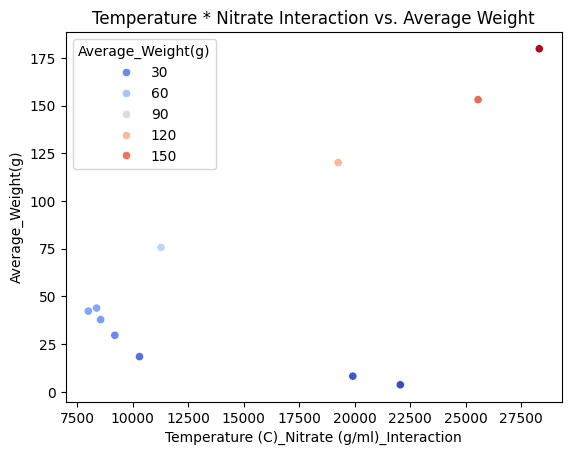

In [ ]:
# Scatterplot for Temperature * Nitrate Interaction vs. Average Weight
sns.scatterplot(
    x=df_processed['Temperature (C)_Nitrate (g/ml)_Interaction'],
    y=df_processed['Average_Weight(g)'],
    hue=df_processed['Average_Weight(g)'],
    palette='coolwarm'
)
plt.title("Temperature * Nitrate Interaction vs. Average Weight")
plt.show()


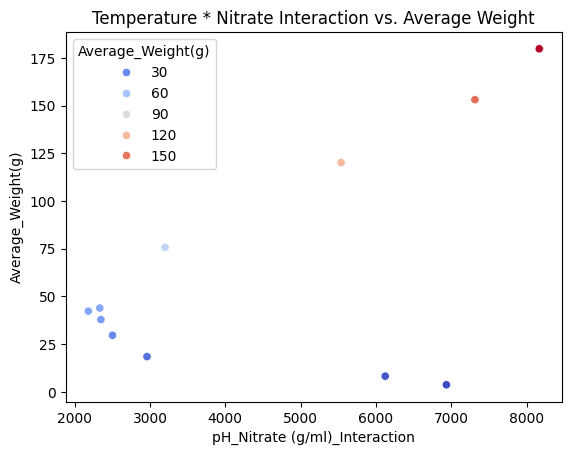

In [ ]:
# Scatterplot for pH * Nitrate Interaction vs. Average Weight
sns.scatterplot(
    x=df_processed['pH_Nitrate (g/ml)_Interaction'],
    y=df_processed['Average_Weight(g)'],
    hue=df_processed['Average_Weight(g)'],
    palette='coolwarm'
)
plt.title("Temperature * Nitrate Interaction vs. Average Weight")
plt.show()


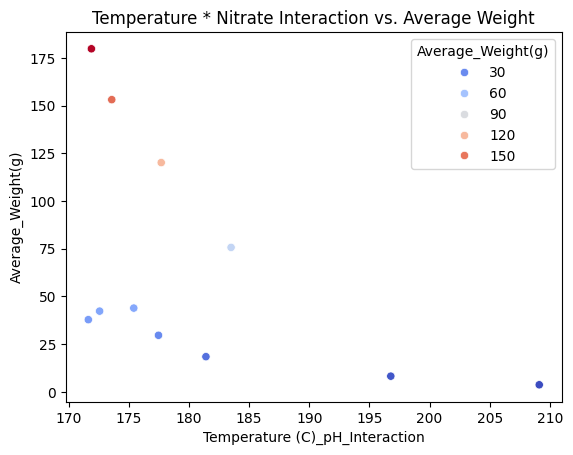

In [ ]:
# Scatterplot for Temperature * pH vs. Average Weight
sns.scatterplot(
    x=df_processed['Temperature (C)_pH_Interaction'],
    y=df_processed['Average_Weight(g)'],
    hue=df_processed['Average_Weight(g)'],
    palette='coolwarm'
)
plt.title("Temperature * Nitrate Interaction vs. Average Weight")
plt.show()


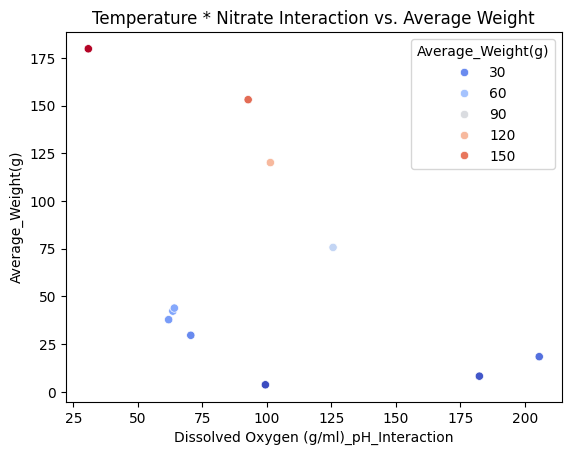

In [ ]:
# Scatterplot for DO * pH vs. Average Weight
sns.scatterplot(
    x=df_processed['Dissolved Oxygen (g/ml)_pH_Interaction'],
    y=df_processed['Average_Weight(g)'],
    hue=df_processed['Average_Weight(g)'],
    palette='coolwarm'
)
plt.title("Temperature * Nitrate Interaction vs. Average Weight")
plt.show()


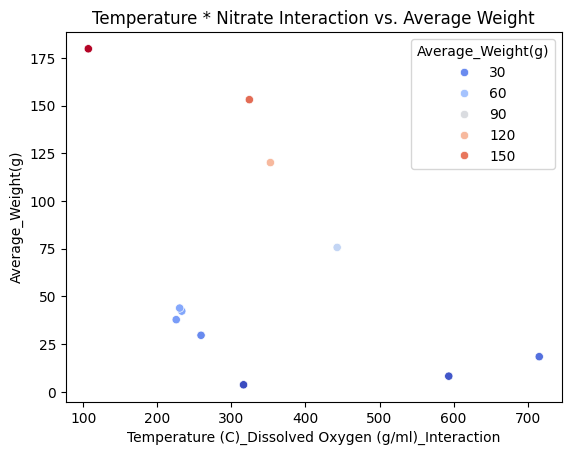

In [ ]:
# Scatterplot for Temperatre*DO vs. Average Weight
sns.scatterplot(
    x=df_processed['Temperature (C)_Dissolved Oxygen (g/ml)_Interaction'],
    y=df_processed['Average_Weight(g)'],
    hue=df_processed['Average_Weight(g)'],
    palette='coolwarm'
)
plt.title("Temperature * Nitrate Interaction vs. Average Weight")
plt.show()
